<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/ANN_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facemask carrying detection¶**

Task of this project is to train a deep learning model that is able to solve an object detection problem. The specific problem solved in this notebook is "Facemask carrying detection" problem, where the deep learning model needs to detect if people are wearing masks or not.

Dataset used for this purpose has images belonging to three classes - no mask, mask and mask worn incorrectly.

**Objective:**
Identifying whether a person is wearing a face mask or not, and whether they are wearing it correctly.

**YOLO model:**

In this notebook, YOLOv5 model is used for training.

YOLO algorithm employs convolutional neural networks (CNN) to detect objects in real-time, and is an acronym for “You Only Look Once”. As the name suggests, the algorithm requires only a single forward propagation through a neural network to detect objects. [1]

YOLO algorithm aims to predict a class of an object and the bounding box that defines the object location on the input image. In addition to that, YOLO predicts the corresponding number c for the predicted class as well as the probability of the prediction. [2]

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import random
import glob
from datetime import datetime
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Clone YOLOv5 (If not already cloned)
!git clone https://github.com/ultralytics/yolov5

# Step 2: Navigate into the cloned repository
%cd yolov5

# Step 3: Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
!pip install --upgrade kagglehub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.8/870.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
  Created wheel for grpclib: filename=grpclib-0.4.7-py3-none-any.whl size=7622

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/face-mask-detection")

print("Path to dataset files:", path)

100%|██████████| 398M/398M [00:04<00:00, 94.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1


In [5]:
# Loading the data
input_data = '/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1'
output_data = '/content/yolov5'

In [6]:
# Reading annotations path of input images
annotations_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/annotations"
images_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images"

In [7]:
mask_weared_incorrect_filenames = []

# Read the data from .xml files using annotations and extract filename and dimensions of the bounding boxes
dataset = {
            "file":[],
            "name":[],
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],
            "xmax":[],
            "ymax":[],
           }

for anno in glob.glob(annotations_path+"/*.xml"):
    tree = ET.parse(anno)

    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag:
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))

        if 'object' in elem.tag:
            for attr in list(elem):

                if 'name' in attr.tag:
                    name = attr.text
                    if name == 'mask_weared_incorrect':
                        mask_weared_incorrect_filenames.append(anno.split('/')[-1][0:-4])
                        break
                    dataset['name']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height]
                    dataset['file']+=[anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            dataset['ymin']+=[ymin]
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            dataset['xmax']+=[xmax]
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            dataset['ymax']+=[ymax]

In [8]:
mask_weared_incorrect_filenames[10]

'maksssksksss741'

In [9]:
# Import data from previous step into a pandas dataframe
df=pd.DataFrame(dataset)
df.head(10)

,file,name,width,height,xmin,ymin,xmax,ymax
0,maksssksksss49,with_mask,400,225,352,102,370,123
1,maksssksksss49,with_mask,400,225,272,33,289,51
2,maksssksksss49,with_mask,400,225,188,124,206,143
3,maksssksksss49,with_mask,400,225,20,54,41,72
4,maksssksksss49,with_mask,400,225,123,68,141,87
5,maksssksksss49,with_mask,400,225,157,45,173,63
6,maksssksksss49,without_mask,400,225,95,211,113,225
7,maksssksksss49,without_mask,400,225,225,181,240,200
8,maksssksksss181,with_mask,400,225,70,58,93,82
9,maksssksksss181,with_mask,400,225,100,57,124,82


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    3949 non-null   object
 1   name    3949 non-null   object
 2   width   3949 non-null   int64 
 3   height  3949 non-null   int64 
 4   xmin    3949 non-null   int64 
 5   ymin    3949 non-null   int64 
 6   xmax    3949 non-null   int64 
 7   ymax    3949 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 246.9+ KB


In [11]:
name_dict = {
    'with_mask': 0,
    'without_mask': 1
}

df['class'] = df['name'].map(name_dict)

In [12]:
np.sort(df.name.unique())

array(['with_mask', 'without_mask'], dtype=object)

In [13]:
# Descriptive statistics
pd.options.display.max_columns = 13
pd.DataFrame(df.describe(include='all').round(2))

,file,name,width,height,xmin,ymin,xmax,ymax,class
count,3949,3949,3949.00,3949.00,3949.00,3949.00,3949.00,3949.00,3949.00
unique,832,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,maksssksksss603,with_mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,113,3232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,393.99,269.58,182.51,85.92,213.44,120.68,0.18
std,NaN,NaN,34.61,51.77,104.47,52.80,102.70,70.78,0.39
min,NaN,NaN,193.00,156.00,1.00,1.00,8.00,6.00,0.00
25%,NaN,NaN,400.00,226.00,96.00,49.00,134.00,73.00,0.00
50%,NaN,NaN,400.00,267.00,178.00,75.00,213.00,103.00,0.00
75%,NaN,NaN,400.00,280.00,266.00,113.00,293.00,148.00,0.00


In [14]:
# Number of images in each class
labels = df.name.unique()
labels_list = [df['name'].value_counts()["with_mask"], df['name'].value_counts()["without_mask"]]
print(labels_list)
print(labels)

[3232, 717]
['with_mask' 'without_mask']


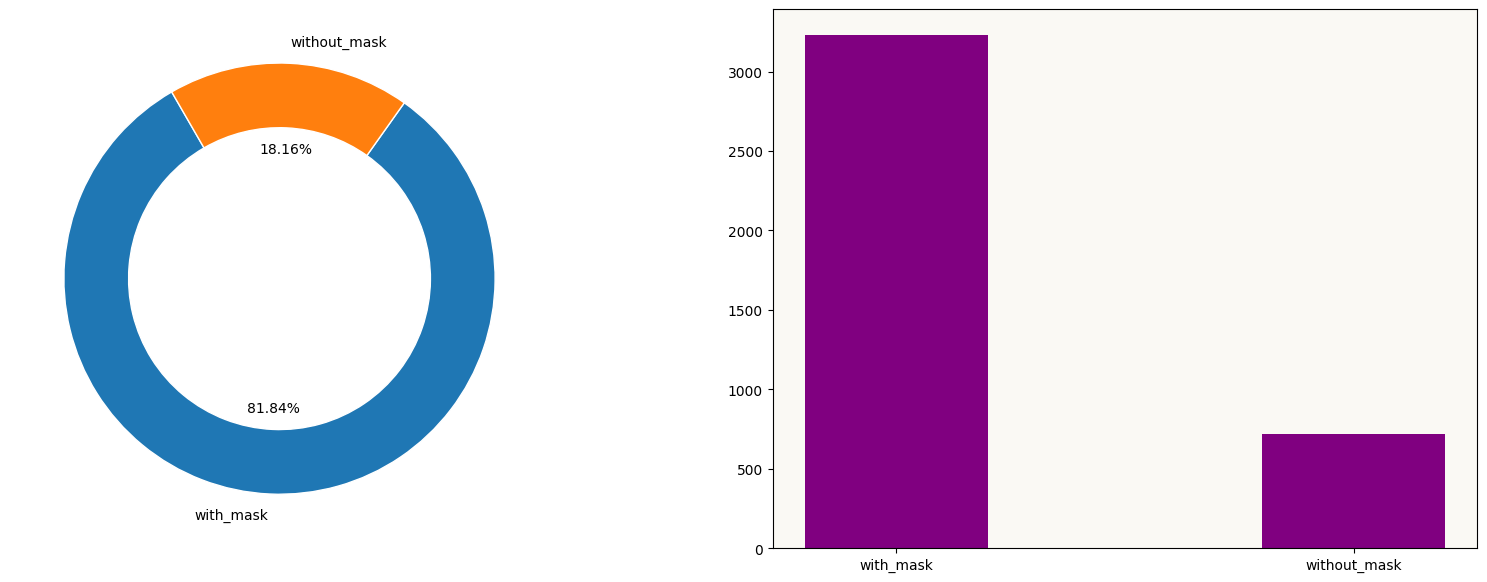

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(20,7))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(labels_list, wedgeprops=dict(width=0.3, edgecolor='w'),
        labels=labels, radius=1, startangle=120, autopct='%1.2f%%')

ax2 = plt.bar(labels, list(labels_list),
              color ='purple',width = 0.4)

plt.show()

**Train Test Split**

In [16]:
fileNames = [*os.listdir("/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images")]
print('There are {} images in the dataset'.format(len(fileNames)))

There are 853 images in the dataset


In [17]:
for filename in mask_weared_incorrect_filenames:
    fileNames = [a for a in fileNames if a.startswith(filename) == False]

In [18]:
print('There are {} images in the dataset'.format(len(fileNames)))

There are 617 images in the dataset


In [19]:
# Splitting the dataset into training, testing and validation set
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size=0.1, random_state=22)
test, val = train_test_split(test, test_size=0.7, random_state=22)
print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of Test =", len(test))

Length of Train = 555
Length of Valid = 44
Length of Test = 18


**Graph Train test split**

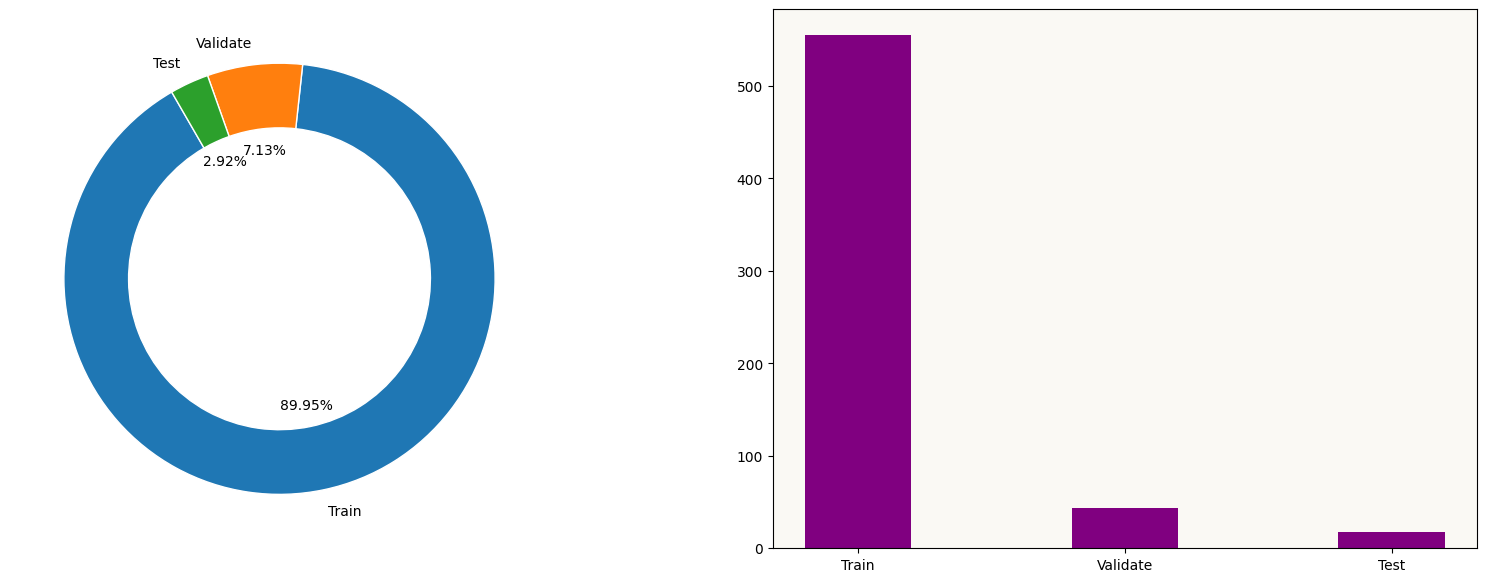

In [20]:
data = [len(train), len(val), len(test)]
labels = ['Train', 'Validate', 'Test']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(20,7))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(data, wedgeprops=dict(width=0.3, edgecolor='w'),
        labels=labels, radius=1, startangle=120, autopct='%1.2f%%')

ax2 = plt.bar(labels, list(data),
              color ='purple',width = 0.4)

plt.show()


In [21]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /content/yolov5


In [22]:
os.chdir('/content/yolov5')

os.makedirs('./yolov5/data/train/images', exist_ok=True)
os.makedirs('./yolov5/data/train/labels', exist_ok=True)
os.makedirs('./yolov5/data/val/images', exist_ok=True)
os.makedirs('./yolov5/data/val/labels', exist_ok=True)
os.makedirs('./yolov5/data/test/images', exist_ok=True)
os.makedirs('./yolov5/data/test/labels', exist_ok=True)
os.makedirs("./yolov5/data/test/models", exist_ok=True)

In [23]:
!ls models/


common.py	 hub	      segment  yolo.py	     yolov5m.yaml  yolov5s.yaml
experimental.py  __init__.py  tf.py    yolov5l.yaml  yolov5n.yaml  yolov5x.yaml


In [ ]:
# import os

# file_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images"

# if os.path.exists(file_path):
#     print("File exists!")
# else:
#     print("File not found. Please check the path.")


File exists!


In [24]:
!ls /root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images/


maksssksksss0.png    maksssksksss293.png  maksssksksss486.png  maksssksksss679.png
maksssksksss100.png  maksssksksss294.png  maksssksksss487.png  maksssksksss67.png
maksssksksss101.png  maksssksksss295.png  maksssksksss488.png  maksssksksss680.png
maksssksksss102.png  maksssksksss296.png  maksssksksss489.png  maksssksksss681.png
maksssksksss103.png  maksssksksss297.png  maksssksksss48.png   maksssksksss682.png
maksssksksss104.png  maksssksksss298.png  maksssksksss490.png  maksssksksss683.png
maksssksksss105.png  maksssksksss299.png  maksssksksss491.png  maksssksksss684.png
maksssksksss106.png  maksssksksss29.png   maksssksksss492.png  maksssksksss685.png
maksssksksss107.png  maksssksksss2.png	  maksssksksss493.png  maksssksksss686.png
maksssksksss108.png  maksssksksss300.png  maksssksksss494.png  maksssksksss687.png
maksssksksss109.png  maksssksksss301.png  maksssksksss495.png  maksssksksss688.png
maksssksksss10.png   maksssksksss302.png  maksssksksss496.png  maksssksksss689.png
maksss

In [25]:
# Normalizing data and sort images in appropriate directories
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open(input_data+"/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save(output_data+"/yolov5/data/"+folder_Name+"/images/"+image)

copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [26]:
df.head(10)

,file,name,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss49,with_mask,400,225,352,102,370,123,0
1,maksssksksss49,with_mask,400,225,272,33,289,51,0
2,maksssksksss49,with_mask,400,225,188,124,206,143,0
3,maksssksksss49,with_mask,400,225,20,54,41,72,0
4,maksssksksss49,with_mask,400,225,123,68,141,87,0
5,maksssksksss49,with_mask,400,225,157,45,173,63,0
6,maksssksksss49,without_mask,400,225,95,211,113,225,1
7,maksssksksss49,without_mask,400,225,225,181,240,200,1
8,maksssksksss181,with_mask,400,225,70,58,93,82,0
9,maksssksksss181,with_mask,400,225,100,57,124,82,0


In [27]:
# Ensure all required columns exist and are converted to numeric
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['xmax'] = pd.to_numeric(df['xmax'], errors='coerce')
df['ymax'] = pd.to_numeric(df['ymax'], errors='coerce')
df['xmin'] = pd.to_numeric(df['xmin'], errors='coerce')
df['ymin'] = pd.to_numeric(df['ymin'], errors='coerce')

# Drop any rows with NaN values (if conversion failed for any entry)
df = df.dropna()

# Apply bounding box scaling after ensuring numeric values
df['xmax'] = (640 / df['width']) * df['xmax']
df['ymax'] = (480 / df['height']) * df['ymax']
df['xmin'] = (640 / df['width']) * df['xmin']
df['ymin'] = (480 / df['height']) * df['ymin']

In [28]:
df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

In [29]:
df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

In [30]:
df.head()

,file,name,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_height,box_width
0,maksssksksss49,with_mask,400,225,563,217,592,262,0,0.902344,0.498958,0.045312,0.093750
1,maksssksksss49,with_mask,400,225,435,70,462,108,0,0.700781,0.185417,0.042188,0.079167
2,maksssksksss49,with_mask,400,225,300,264,329,305,0,0.491406,0.592708,0.045312,0.085417
3,maksssksksss49,with_mask,400,225,32,115,65,153,0,0.075781,0.279167,0.051562,0.079167
4,maksssksksss49,with_mask,400,225,196,145,225,185,0,0.328906,0.343750,0.045312,0.083333


In [31]:
df = df.astype('string')

In [32]:
# Add labels of images to appropriate directories
def create_labels(image_list, data_name):
    fileNames = [x.split(".")[0] for x in image_list]

    for name in fileNames:
        data = df[df.file==name]
        box_list = []

        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])

        text = "\n".join(box_list)
        with open(output_data+"/yolov5/data/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)


create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

Configure the Model

In [33]:
import os

if not os.path.exists('/content/yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git /content/yolov5
%cd /content/yolov5


/content/yolov5


In [38]:
# Positioning inside YOLO directory to display images
%cd /content/yolov5
from IPython.display import Image, clear_output
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/107.7 GB disk)


In [39]:
# Configure .yaml file to guide the model for training
yaml_text = """train: data/train/images
val: data/train/images

nc: 2
names: ['with_mask', 'without_mask']"""

with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat data/data.yaml

train: data/train/images
val: data/train/images

nc: 2
names: ['with_mask', 'without_mask']

In [40]:
# Customize iPython writefile for writing variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [41]:
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now proceed to write the template to the 'models/custom_yolov5s.yaml' file
with open('models/custom_yolov5s.yaml', 'w') as f:
    f.write("""
    # parameters
    nc: 2  # number of classes
    depth_multiple: 0.33  # model depth multiple
    width_multiple: 0.50  # layer channel multiple

    # anchors
    anchors:
        - [10,13, 16,30, 33,23]  # P3/8
        - [30,61, 62,45, 59,119]  # P4/16
        - [116,90, 156,198, 373,326]  # P5/32

    # YOLOv5 backbone
    backbone:
      # [from, number, module, args]
      [[-1, 1, Focus, [64, 3]],  # 0-P1/2
       [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
       [-1, 3, BottleneckCSP, [128]],
       [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
       [-1, 9, BottleneckCSP, [256]],
       [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
       [-1, 9, BottleneckCSP, [512]],
       [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
       [-1, 1, SPP, [1024, [5, 9, 13]]],
       [-1, 3, BottleneckCSP, [1024, False]],  # 9
      ]

    # YOLOv5 head
    head:
        [[-1, 1, Conv, [512, 1, 1]],
        [-1, 1, nn.Upsample, [None, 2, 'nearest']],
        [[-1, 6], 1, Concat, [1]],  # cat backbone P4
        [-1, 3, BottleneckCSP, [512, False]],  # 13

        [-1, 1, Conv, [256, 1, 1]],
        [-1, 1, nn.Upsample, [None, 2, 'nearest']],
        [[-1, 4], 1, Concat, [1]],  # cat backbone P3
        [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

        [-1, 1, Conv, [256, 3, 2]],
        [[-1, 14], 1, Concat, [1]],  # cat head P4
        [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

        [-1, 1, Conv, [512, 3, 2]],
        [[-1, 10], 1, Concat, [1]],  # cat head P5
        [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

        [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
        ]
    """)


In [43]:
!wget </root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1> -P /content/yolov5/data/train/images


/content/yolov5/data/train/images: Scheme missing.


# **Trarining the Network**

In [42]:
start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache
end = datetime.now()


2025-02-08 11:35:42.727470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739014543.130443    4160 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739014543.239944    4160 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/custom_yolov5s.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, projec